<a href="https://colab.research.google.com/github/Malek-Ghorbel/ranking-semantics-Abstract-Argumentation/blob/main/1_Categoriser_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import matplotlib.pyplot as plt
import networkx as nx

### Define the argumentation framework and categoriser values

In [32]:
def create_graph(nodes, edges):
  AF = nx.DiGraph()
  AF.add_nodes_from(nodes)
  AF.add_edges_from(edges)
  return AF

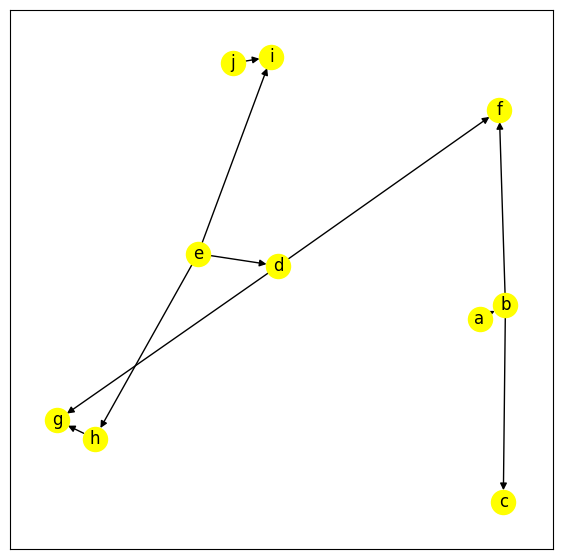

In [33]:
nodes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
edges = [('a', 'b'), ('b' , 'c'), ('b', 'f'), ('d', 'f'), ('d', 'g'), ('e', 'h'), ('e', 'd'), ('e', 'i'),  ('j', 'i'), ('h', 'g')]
G = create_graph(nodes, edges)
plt.figure(figsize =(7, 7))
nx.draw_networkx(G, with_labels = True, node_color ='yellow')

### Define the function for comparing categoriser values

In [66]:
def categoriser_based_ranking(G) :
    # Initialize
    categoriser_values = {}
    for node in G.nodes():
        categoriser_values[node] = 1

    # Compute categoriser values
    for node in G.nodes():
     if len(list(G.predecessors(node))) == 0:
        categoriser_values[node] = 1
     else:
        total_sum = sum(categoriser_values[pred] for pred in G.predecessors(node))
        categoriser_values[node] = 1 / (1 + total_sum)

    # Rank
    sorted_nodes = sorted(G.nodes(), key=lambda x: categoriser_values[x], reverse=True)
    return sorted_nodes

In [67]:
sorted_nodes = categoriser_based_ranking(G)
print(sorted_nodes)

['a', 'e', 'j', 'c', 'b', 'd', 'f', 'h', 'g', 'i']
